EC9630 Machine Learning - Laboratory 03

Task : Lab 03                     
Name : H.M.U.C.Herath                    
Reg No : 2021/E/049    
Date : 2025.03.07         
Time : 02:00

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings

# Read Data

In [7]:
#Read the data as a CSV file
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [5]:
# print data
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

# Handle Missing Values and Categorical Variables

In [22]:
# Handle missing values
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [23]:
# Fill numeric columns with mean
df.fillna(df.mean(), inplace=True)

In [24]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [25]:
# check categorical colums
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [26]:
# Label encoding (for categorical variables)

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

# Divide the Dataset into Input (X) and Target (y)

In [27]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Create the Training, Validation, and Test Datasets

In [28]:

# 90% for training+validation, 10% for testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42,
                                                  stratify=y)

# 70% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,
                                                  train_size=0.7 / 0.9,
                                                  random_state=42,
                                                  stratify=y_temp)

print(f"Train : {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]:.1%})")
print(f"Val   : {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]:.1%})")
print(f"Test  : {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]:.1%})")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Train : 177575 samples (70.0%)
Val   : 50737 samples (20.0%)
Test  : 25368 samples (10.0%)


# Fit a Nonlinear Model Using Radial Basis Function (RBF)


In [29]:
def rbf_kernel(X, centers, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - centers, axis=2) ** 2)

# a. Implement RBF kernel functions
num_centers = 100
random_idx = np.random.choice(X_train_scaled.shape[0], num_centers, replace=False)
centers = X_train_scaled[random_idx]
X_train_rbf = rbf_kernel(X_train_scaled, centers)
X_val_rbf = rbf_kernel(X_val_scaled, centers)
X_test_rbf = rbf_kernel(X_test_scaled, centers)

# b. Train the model using appropriate optimization techniques
from sklearn.linear_model import LogisticRegression
rbf_model = LogisticRegression(max_iter=1000)
rbf_model.fit(X_train_rbf, y_train)
y_pred_rbf = rbf_model.predict(X_test_rbf)

# c. Tune hyperparameters
param_grid = {
    'C': [0.1, 1, 10]
}
from sklearn.model_selection import GridSearchCV
grid_search_rbf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3)
grid_search_rbf.fit(X_train_rbf, y_train)
print("Best parameters for RBF model :", grid_search_rbf.best_params_)
best_rbf_model = grid_search_rbf.best_estimator_
print(" ")

# d. Evaluate the model
print("RBF Model Performance :")
print(classification_report(y_test, y_pred_rbf))

Best parameters for RBF model : {'C': 0.1}
 
RBF Model Performance :
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     21370
         1.0       0.00      0.00      0.00       463
         2.0       0.00      0.00      0.00      3535

    accuracy                           0.84     25368
   macro avg       0.28      0.33      0.30     25368
weighted avg       0.71      0.84      0.77     25368



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Apply a Perceptron on the Training Data

In [30]:
# Train the Perceptron model

perceptron = Perceptron(max_iter=500, random_state=42)
perceptron.fit(X_train_scaled, y_train)

val_pred_perceptron = perceptron.predict(X_val_scaled)
val_acc_perceptron = accuracy_score(y_val, val_pred_perceptron)
print(f"Perceptron validation accuracy : {val_acc_perceptron:.4f}")

Perceptron validation accuracy : 0.7913


# Apply a Multi Layer Perceptron (MLP)

MLP layers=(50,), act=relu: val_acc=0.8509
MLP layers=(100, 50), act=tanh: val_acc=0.8499
 
Best MLP validation accuracy : 0.8509


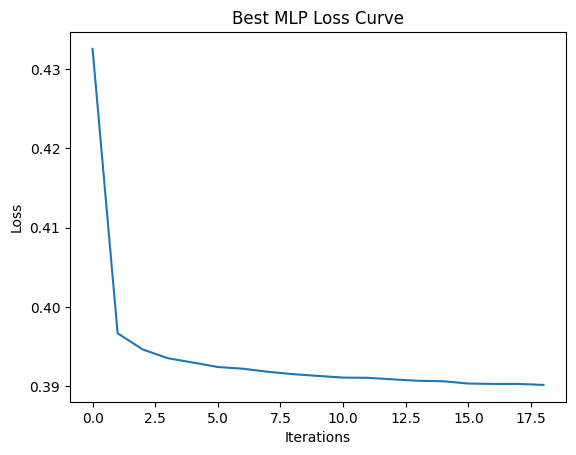

In [31]:
# Define the MLP model architecture

mlp_configs = [
    {'hidden_layer_sizes': (50,), 'activation': 'relu'},
    {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}
]

best_mlp = None
best_mlp_acc = 0

for config in mlp_configs:
    mlp = MLPClassifier(hidden_layer_sizes=config['hidden_layer_sizes'],
                        activation=config['activation'],
                        max_iter=300,
                        early_stopping=True,
                        random_state=42)

    # Train the model on the training data
    mlp.fit(X_train_scaled, y_train)
    val_pred_mlp = mlp.predict(X_val_scaled)
    val_acc_mlp = accuracy_score(y_val, val_pred_mlp)

    print(f"MLP layers={config['hidden_layer_sizes']}, act={config['activation']}: val_acc={val_acc_mlp:.4f}")

    if val_acc_mlp > best_mlp_acc:
        best_mlp_acc = val_acc_mlp
        best_mlp = mlp

print(" ")
print(f"Best MLP validation accuracy : {best_mlp_acc:.4f}")

#Plot the loss curve for the best model
import matplotlib.pyplot as plt
plt.plot(best_mlp.loss_curve_)
plt.title('Best MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [32]:
# Hyperparameters tuning
# Define the parameter grid
#param_grid = {
    #'hidden_layer_sizes': [(50,), (100, 50), (100,)],
    #'activation': ['relu', 'tanh'],
    #'solver': ['adam', 'sgd'],
    #'learning_rate_init': [0.001, 0.01, 0.1]
#}

# Use GridSearchCV to find the best parameters
#grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=3)
#grid_search.fit(X_train, y_train)

# Print the best parameters
#print("Best hyperparameters:", grid_search.best_params_)


# Evaluate the Models on the Test Data


Plotting Learning Curve for RBF Model...


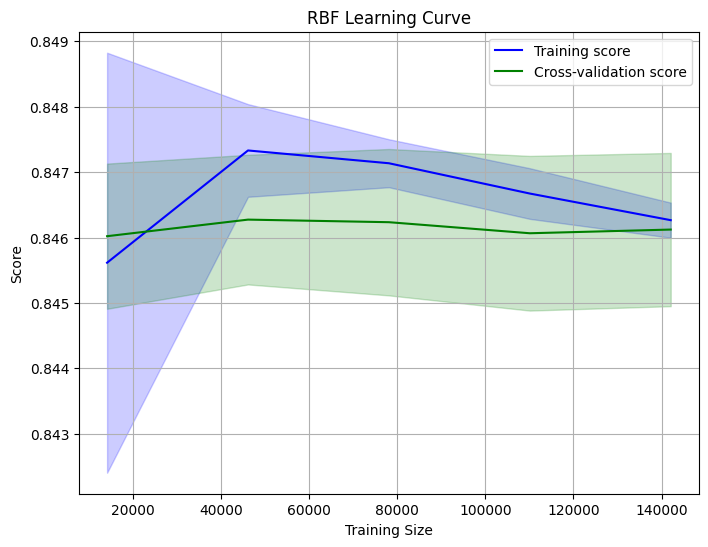


Plotting Learning Curve for Perceptron Model...


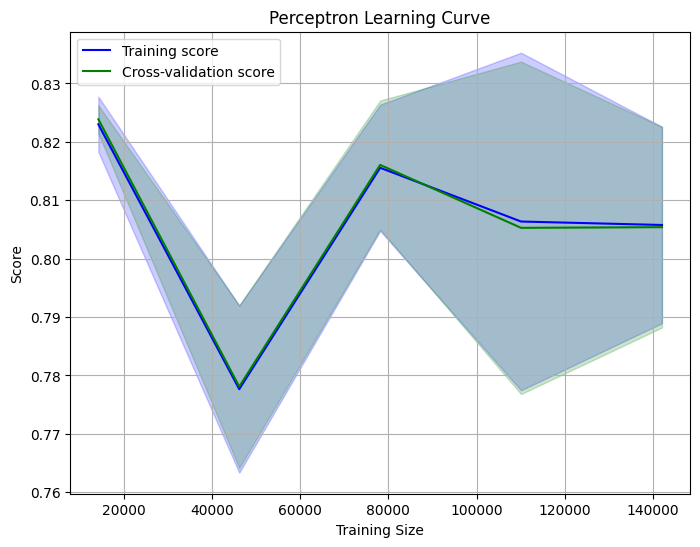


Plotting Learning Curve for MLP Model...


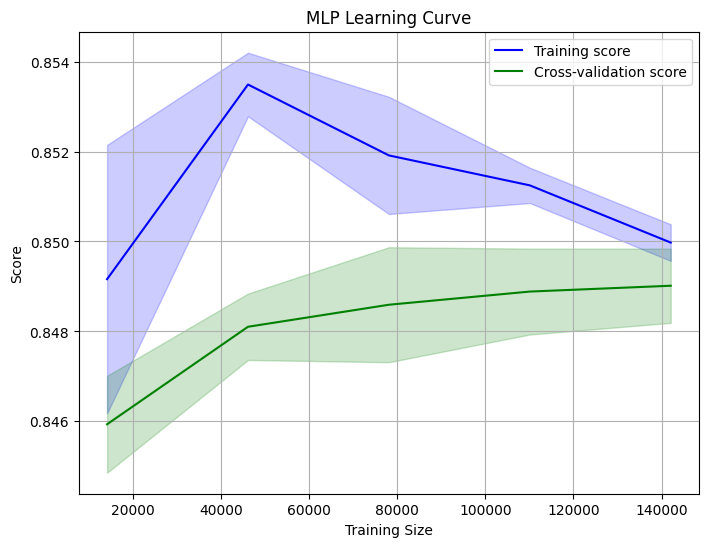

In [33]:
# Plot Learning Curves to Analyze Model Convergence and Overfitting

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, X, y, title="Learning Curve"):
    """Plots the learning curve for the given model and dataset."""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Calculate the mean and standard deviation of the training and testing scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

    # Plot the standard deviation shaded area
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Now you can call the function to plot the learning curves:
print("\nPlotting Learning Curve for RBF Model...")
plot_learning_curve(best_rbf_model, X_train_scaled, y_train, title="RBF Learning Curve")

print("\nPlotting Learning Curve for Perceptron Model...")
plot_learning_curve(perceptron, X_train_scaled, y_train, title="Perceptron Learning Curve")

print("\nPlotting Learning Curve for MLP Model...")
plot_learning_curve(best_mlp, X_train_scaled, y_train, title="MLP Learning Curve")

print(" ")


# Compare with previous lab results

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Previous Lab Results:

Accuracy: 0.8526
Precision: 0.8170
Recall: 0.8526
F1_score: 0.8066

RBF Model Results:

Accuracy: 0.8424
Precision: 0.7096
Recall: 0.8424
F1_score: 0.7703

Perceptron Model Results:

Accuracy: 0.7869
Precision: 0.8017
Recall: 0.7869
F1_score: 0.7940

MLP Model Results:

Accuracy: 0.8485
Precision: 0.8053
Recall: 0.8485
F1_score: 0.8152


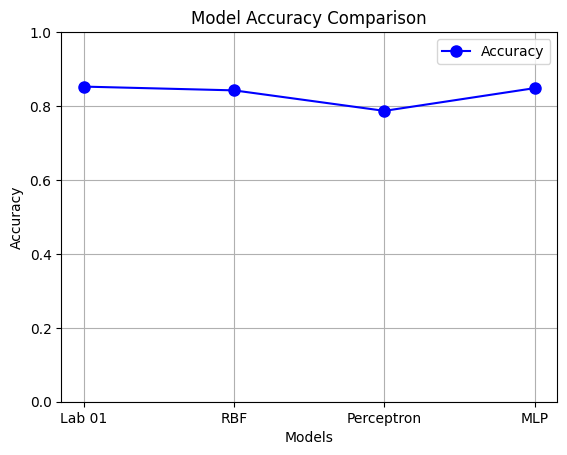

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Lab 01 results
prev_results = {
    "accuracy": 0.8526,
    "precision": 0.8170,
    "recall": 0.8526,
    "f1_score": 0.8066
}

# Replace with Lab 03 results
y_true = y_test

# Get predictions for models
y_pred_rbf = best_rbf_model.predict(X_test_rbf)
y_pred_perceptron = perceptron.predict(X_test_scaled)
y_pred_mlp = best_mlp.predict(X_test_scaled)

# Function to compute metrics for a model
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average='weighted'),
        "recall": recall_score(y_true, y_pred, average='weighted'),
        "f1_score": f1_score(y_true, y_pred, average='weighted'),
    }

# Evaluate models
rbf_results = evaluate_model(y_true, y_pred_rbf)
perceptron_results = evaluate_model(y_true, y_pred_perceptron)
mlp_results = evaluate_model(y_true, y_pred_mlp)

# Display previous and current results
print("")
print("Previous Lab Results:")
print("")
for metric, value in prev_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nRBF Model Results:")
print("")
for metric, value in rbf_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nPerceptron Model Results:")
print("")
for metric, value in perceptron_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nMLP Model Results:")
print("")
for metric, value in mlp_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Plot comparison of accuracy using a line plot
labels = ["Lab 01", "RBF", "Perceptron", "MLP"]
accuracies = [prev_results["accuracy"], rbf_results["accuracy"], perceptron_results["accuracy"], mlp_results["accuracy"]]

plt.plot(labels, accuracies, marker='o', color='b', linestyle='-', markersize=8, label="Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()
